In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataframe=pd.read_excel("Dataset_employee#2.xlsx")
dataframe

,EmployeeID,Job,period,Team,Dismiss
0,6828.962963,1,16,Team Y,NaN
1,6828.962963,2,13,Team Y,NaN
2,6828.962963,3,2,Team Y,1.0
3,8219.444444,3,7,NaN,NaN
4,7096.444444,2,21,Team Z,NaN
...,...,...,...,...,...
149,725.037037,3,16,Team W,NaN
150,725.037037,4,3,Team W,NaN
151,725.037037,5,14,Team W,1.0
152,9474.296296,3,10,Team V,NaN


In [ ]:
dataframe['Team'].fillna('Team L', inplace=True)
dataframe['Dismiss'].fillna(0, inplace=True)
dataframe

,EmployeeID,Job,period,Team,Dismiss
0,6828.962963,1,16,Team Y,0.0
1,6828.962963,2,13,Team Y,0.0
2,6828.962963,3,2,Team Y,1.0
3,8219.444444,3,7,Team L,0.0
4,7096.444444,2,21,Team Z,0.0
...,...,...,...,...,...
149,725.037037,3,16,Team W,0.0
150,725.037037,4,3,Team W,0.0
151,725.037037,5,14,Team W,1.0
152,9474.296296,3,10,Team V,0.0


In [ ]:
unique_counts = {}

columns_to_analyze = ['EmployeeID', 'Job', 'period', 'Team', 'Dismiss']

for column in columns_to_analyze:
    unique_counts[column] = dataframe[column].nunique()

for column, count in unique_counts.items():
    print(f'Кількість унікальних значень у стовпці {column}: {count}')

Кількість унікальних значень у стовпці EmployeeID: 99
Кількість унікальних значень у стовпці Job: 7
Кількість унікальних значень у стовпці period: 28
Кількість унікальних значень у стовпці Team: 14
Кількість унікальних значень у стовпці Dismiss: 2


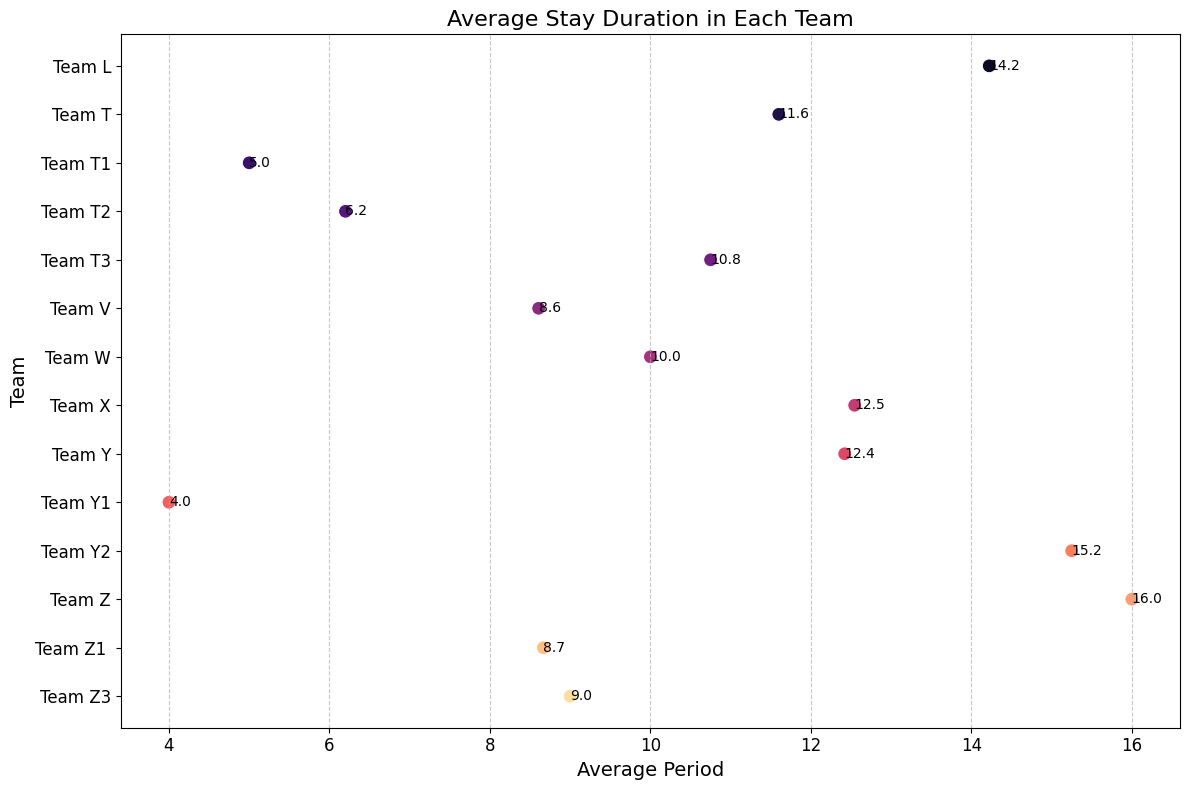

In [ ]:
avg_period_per_team = dataframe.groupby('Team')['period'].mean().reset_index()

plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='period', y='Team', data=avg_period_per_team, hue='Team', s=100, palette='magma', legend=False)

for index, value in enumerate(avg_period_per_team['period']):
    plt.text(value, index, f'{value:.1f}', color='black', ha="left", va='center')

plt.title('Average Stay Duration in Each Team', fontsize=16)
plt.xlabel('Average Period', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
total_team_counts = dataframe.groupby('Team').size()
total_team_counts_df = pd.DataFrame(total_team_counts, columns=['EmployeeCount'])
total_team_counts_df

,EmployeeCount
Team,
Team L,9
Team T,25
Team T1,3
Team T2,5
Team T3,4
Team V,28
Team W,26
Team X,11
Team Y,19


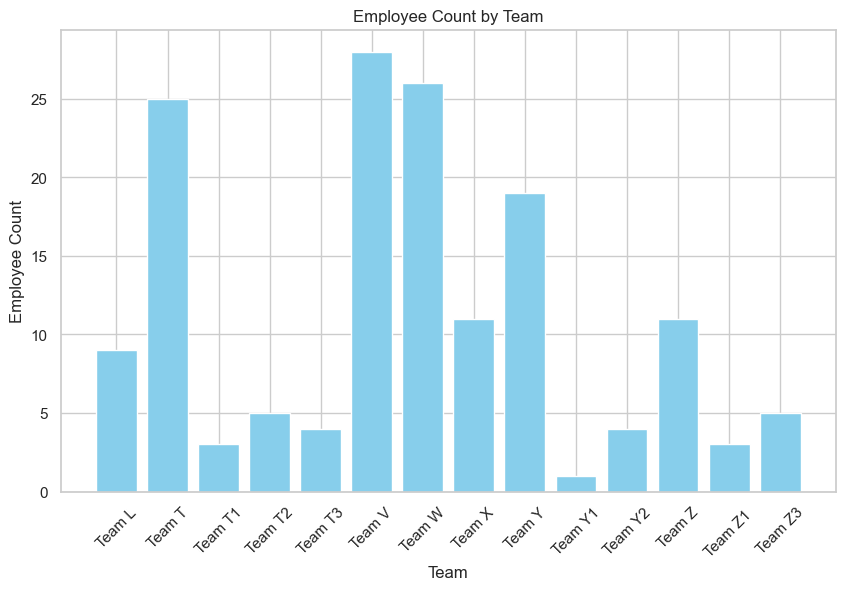

In [ ]:
total_team_counts_df = total_team_counts_df.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_team_counts_df['Team'], total_team_counts_df['EmployeeCount'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Employee Count')
plt.title('Employee Count by Team')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df2=pd.read_excel("Dataset_employee.xlsx")
df2

,Employee ID,Country,Team,Job,Start Date,Finish Date
0,9765.5,Ukraine,Team L,Lead (L5),2012-12-04,2021-10-09
1,12298.0,Ukraine,Team W,Senior (L3),2019-02-25,2021-10-09
2,14884.5,Ukraine,Team Y,Senior (L3),2012-10-01,2021-10-09
3,20325.5,Poland,Team L,Director (L6),2013-07-29,2021-10-09
4,21496.5,Ukraine,Team Z,Lead (L5),2014-03-04,2021-10-09
...,...,...,...,...,...,...
66,127880.5,Poland,Team Z,Senior (L3),2020-12-01,2021-10-09
67,132250.5,Ukraine,Team Z1,Middle (L2),2020-12-30,2021-10-09
68,132540.5,Ukraine,Team V,Senior (L3),2021-01-06,2021-10-09
69,133118.0,Ukraine,Team T,Middle (L2),2021-02-23,2021-10-09


In [ ]:
country = pd.DataFrame(df2.groupby(['Country'])['Employee ID'].count().reset_index())
country

,Country,Employee ID
0,Bulgaria,4
1,France,1
2,Poland,7
3,Ukraine,59


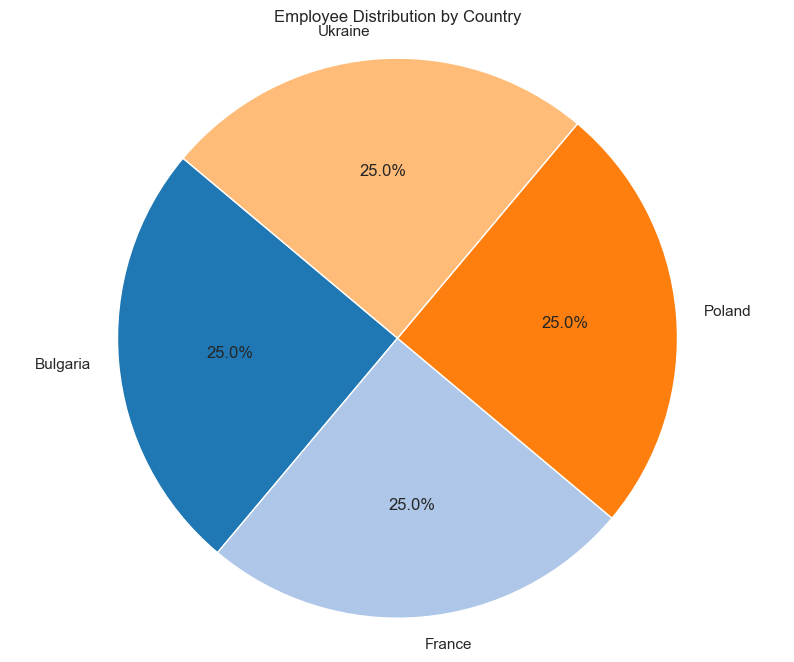

In [ ]:
employee_counts = country['Country'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
colors = plt.get_cmap('tab20').colors
plt.pie(employee_counts, labels=employee_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Employee Distribution by Country')
plt.axis('equal')
plt.show()

In [ ]:
job = pd.DataFrame(df2.groupby('Job')['Employee ID'].count().reset_index())
job

,Job,Employee ID
0,Director (L6),2
1,Junior (L1),5
2,Lead (L4),8
3,Lead (L5),6
4,Middle (L2),25
5,Senior (L3),25


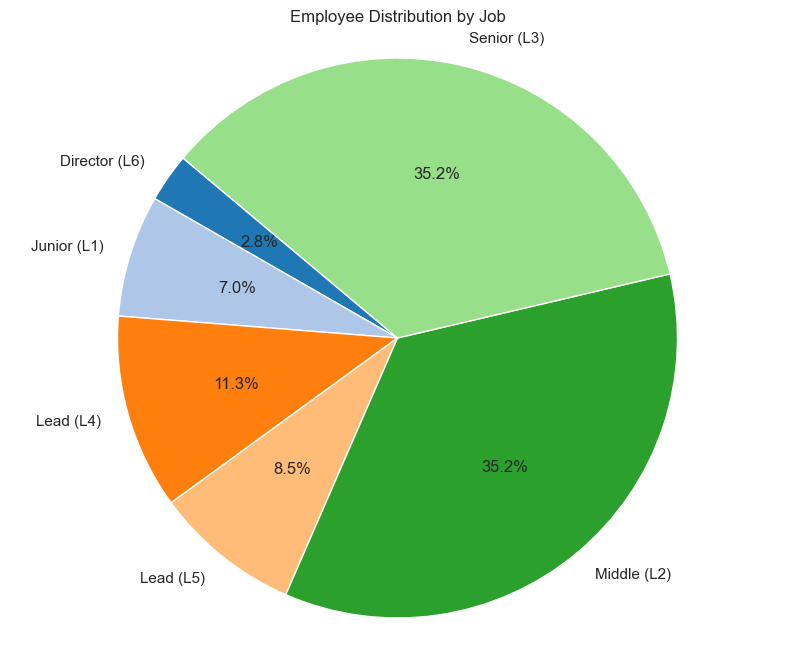

In [ ]:
job = pd.DataFrame(df2.groupby('Job')['Employee ID'].count().reset_index())
job.columns = ['Job', 'EmployeeCount']

plt.figure(figsize=(10, 8))
colors = plt.get_cmap('tab20').colors
plt.pie(job['EmployeeCount'], labels=job['Job'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Employee Distribution by Job')
plt.axis('equal')
plt.show()

In [ ]:
df2['bare Team'] = df2['Team'].str[:6]
df2

,Employee ID,Country,Team,Job,Start Date,Finish Date,bare Team
0,9765.5,Ukraine,Team L,Lead (L5),2012-12-04,2021-10-09,Team L
1,12298.0,Ukraine,Team W,Senior (L3),2019-02-25,2021-10-09,Team W
2,14884.5,Ukraine,Team Y,Senior (L3),2012-10-01,2021-10-09,Team Y
3,20325.5,Poland,Team L,Director (L6),2013-07-29,2021-10-09,Team L
4,21496.5,Ukraine,Team Z,Lead (L5),2014-03-04,2021-10-09,Team Z
...,...,...,...,...,...,...,...
66,127880.5,Poland,Team Z,Senior (L3),2020-12-01,2021-10-09,Team Z
67,132250.5,Ukraine,Team Z1,Middle (L2),2020-12-30,2021-10-09,Team Z
68,132540.5,Ukraine,Team V,Senior (L3),2021-01-06,2021-10-09,Team V
69,133118.0,Ukraine,Team T,Middle (L2),2021-02-23,2021-10-09,Team T


In [ ]:
bareTeamN = pd.DataFrame(df2.groupby('bare Team')['Job'].count().reset_index())
bareTeamN

,bare Team,Job
0,Team L,7
1,Team T,17
2,Team V,9
3,Team W,6
4,Team X,2
5,Team Y,12
6,Team Z,18


<Figure size 1200x800 with 0 Axes>

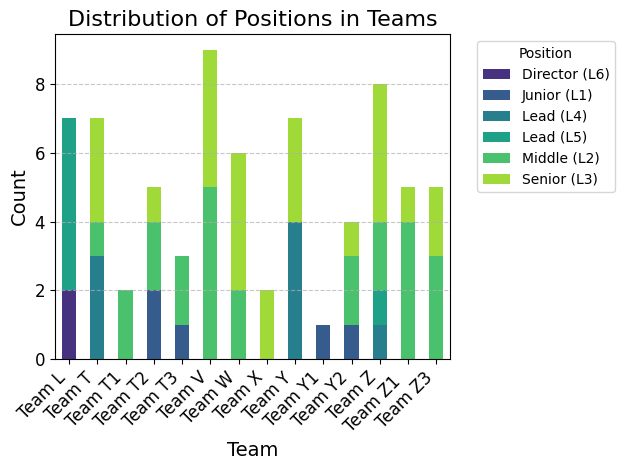

In [ ]:
grouped = df2.groupby(['Team', 'Job']).size().unstack(fill_value=0)

colors = sns.color_palette('viridis', n_colors=grouped.shape[1])

plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Positions in Teams', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
period = pd.DataFrame(df2.groupby('Employee ID')['Finish Date'].size().reset_index())
period['Period'] = df2['Finish Date'] - df2['Start Date']
del period['Finish Date']
period = period.sort_values(by=['Period'])
period

,Employee ID,Period
69,133118.0,228 days
11,41613.0,250 days
65,127130.5,250 days
70,133120.0,257 days
43,97269.0,262 days
...,...,...
7,31312.5,2584 days
4,21496.5,2776 days
3,20325.5,2994 days
0,9765.5,3231 days
